Index(['日付け', '終値', '始値', '高値', '安値', '出来高', '変化率 %'], dtype='object')
             Close         Open         High          Low
count  9202.000000  9202.000000  9202.000000  9202.000000
mean     92.180961    92.256183    93.176451    91.330146
std      50.452228    50.598215    51.049837    50.087405
min      33.000000    33.000000    33.200000    32.200000
25%      52.000000    52.100000    52.800000    51.500000
50%      85.100000    85.100000    86.050000    84.200000
75%     110.800000   110.800000   111.900000   109.275000
max     305.900000   309.800000   311.800000   303.900000
Close             0
Open              0
High              0
Low               0
Volume            0
Percent_Change    0
dtype: int64


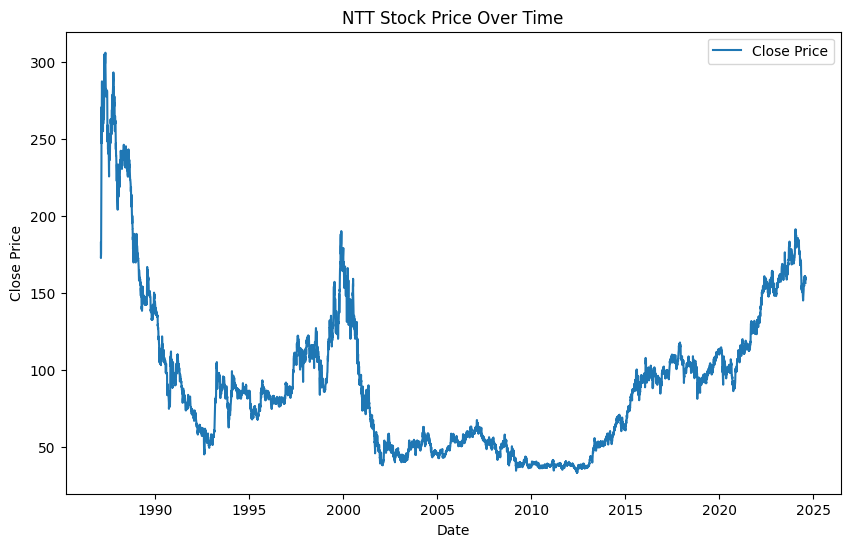

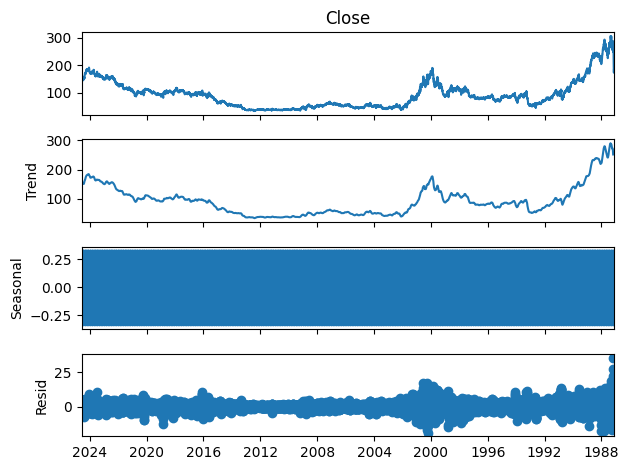

outliers:             Close   Open   High    Low   Volume Percent_Change   Z-Score
Date                                                                    
1988-06-14  244.1  245.1  246.1  242.2   45.14M         -0.41%  3.011146
1988-06-13  245.1  245.1  248.0  244.1  127.74M          0.41%  3.030967
1988-06-10  244.1  244.1  246.1  242.2  224.55M          1.62%  3.011146
1988-05-02  246.1  247.1  248.0  246.1  146.81M          0.82%  3.050788
1988-04-28  244.1  240.2  246.1  239.2  238.64M          1.62%  3.011146
...           ...    ...    ...    ...      ...            ...       ...
1987-03-02  263.7  265.7  267.6  259.8  320.11M          3.86%  3.399633
1987-02-27  253.9  250.0  262.7  244.1  347.71M          2.75%  3.205389
1987-02-26  247.1  256.9  261.8  243.1  349.45M         -2.29%  3.070608
1987-02-25  252.9  258.8  262.7  252.0  733.93M         -6.54%  3.185569
1987-02-24  270.6  258.8  272.5  257.8  605.42M         15.00%  3.536396

[177 rows x 7 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset and display the column names to verify
df = pd.read_csv('/content/stock_price.csv')
print(df.columns)  # To ensure we know the exact column names

# Check if 'Date' is the actual name for the date column
# Assuming the first column is Date, Close price, Open price, etc.
df.columns = ['Date', 'Close', 'Open', 'High', 'Low', 'Volume', 'Percent_Change']

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# EDA: Summary statistics
print(df.describe())

# EDA: Check for missing values
print(df.isnull().sum())

# EDA: Plot closing price over time
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.title('NTT Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# EDA: Decompose the closing price to detect trend, seasonality, and noise (residuals)
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
decomposition.plot()
plt.show()

# EDA: Detect outliers using Z-score
df['Z-Score'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()
outliers = df[np.abs(df['Z-Score']) > 3]
print("outliers:",outliers)

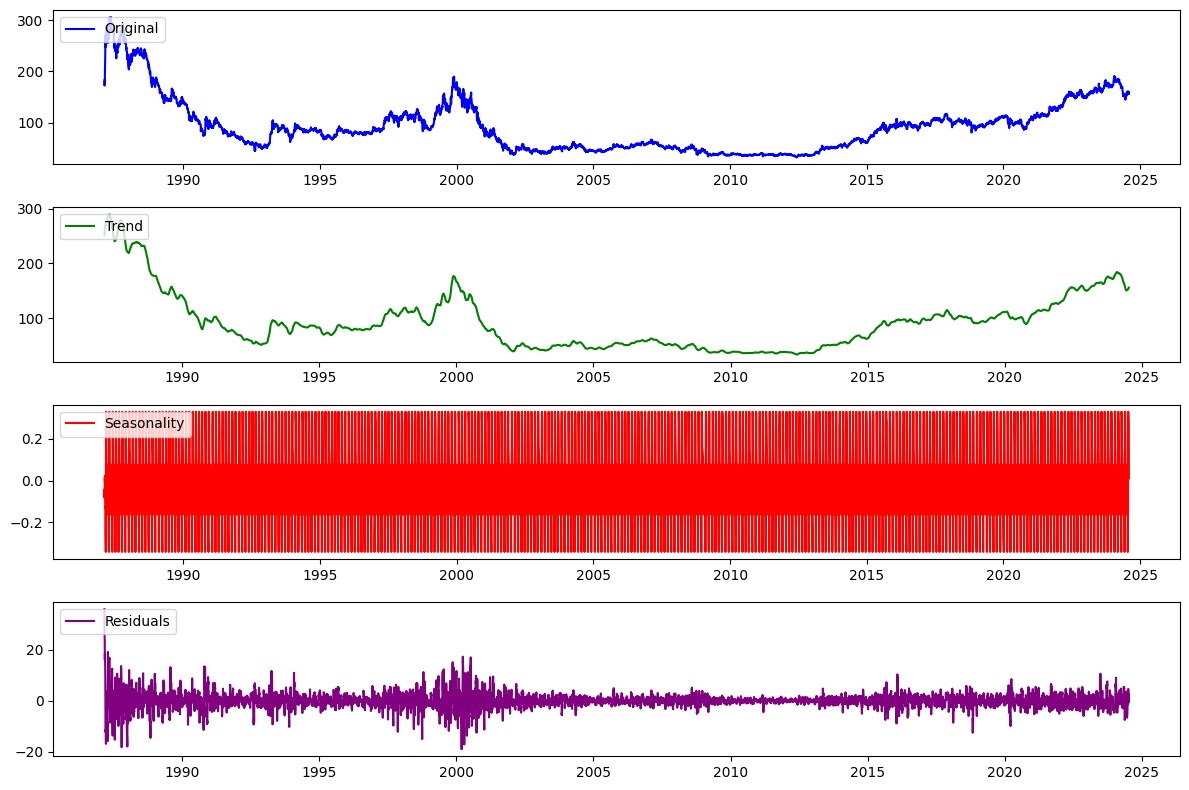

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series (only works if data is evenly spaced)
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed parts
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='red')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='purple')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


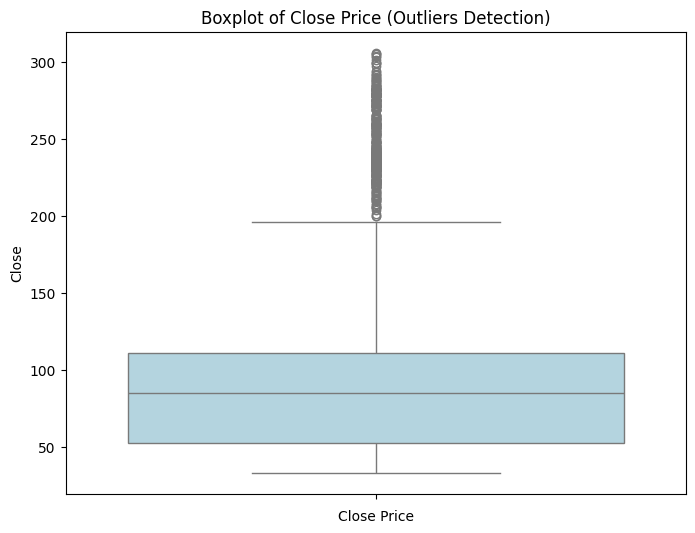

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(df['Close'], color='lightblue')
plt.title('Boxplot of Close Price (Outliers Detection)')
plt.xlabel('Close Price')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
# Function to convert volume strings with 'M' and 'B' to numeric values
def convert_volume(volume):
    if isinstance(volume, str):
        if 'M' in volume:
            return float(volume.replace('M', '')) * 1e6  # Convert millions to numeric
        elif 'B' in volume:
            return float(volume.replace('B', '')) * 1e9  # Convert billions to numeric
    return volume  # If already numeric, return as is

# Apply the function to the 'Volume' column
df['Volume'] = df['Volume'].apply(convert_volume)

# Convert '% Change' to numeric by removing the '%' symbol and dividing by 100
df['Percent_Change'] = df['Percent_Change'].str.replace('%', '').astype(float) / 100

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Scaling numerical features: Close, Open, High, Low, Volume, Percent Change
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Close', 'Open', 'High', 'Low', 'Volume', 'Percent_Change']])

# Convert scaled features back to a DataFrame for better usability
scaled_df = pd.DataFrame(scaled_features, columns=['Close', 'Open', 'High', 'Low', 'Volume', 'Percent_Change'], index=df.index)

# Check preprocessed data
print("The processed data:",scaled_df.head())

# Save preprocessed data for further use (optional)
scaled_df.to_csv('preprocessed_stock_data.csv')

The processed data:                Close      Open      High       Low    Volume  Percent_Change
Date                                                                        
2024-08-01  1.270955  1.325095  1.297304  1.293207 -0.747417       -1.373521
2024-07-31  1.352225  1.303354  1.322771  1.333139  0.009929        0.560864
2024-07-30  1.318528  1.315213  1.293386  1.331143 -0.275954       -0.345046
2024-07-29  1.338349  1.313237  1.312976  1.339129 -0.370742        0.598166
2024-07-26  1.302670  1.325095  1.301222  1.329146 -0.140565       -0.078602


<ipython-input-4-4e0c21bd7c23>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
scaled_df.describe()

,Close,Open,High,Low,Volume,Percent_Change
count,9202.000000,9.202000e+03,9.202000e+03,9.202000e+03,9.202000e+03,9.202000e+03
mean,0.000000,-2.470916e-17,2.470916e-17,-7.412748e-17,-1.235458e-16,-6.563370e-18
std,1.000054,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,-1.173074,-1.171176e+00,-1.174925e+00,-1.180603e+00,-1.305356e+00,-7.864102e+00
25%,-0.796459,-7.936716e-01,-7.909652e-01,-7.952560e-01,-7.347891e-01,-5.102415e-01
50%,-0.140357,-1.414392e-01,-1.396055e-01,-1.423618e-01,-1.490769e-01,-9.326416e-03
75%,0.369063,3.665114e-01,3.667899e-01,3.582903e-01,4.623904e-01,4.702732e-01
max,4.236298,4.299670e+00,4.282784e+00,4.244209e+00,8.850080e+00,8.650111e+00


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any)
#df.fillna(method='ffill', inplace=True)

# Normalize/Scale the Close price
scaler = MinMaxScaler(feature_range=(0, 1))
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

# Feature Engineering: Creating lag features based on the Close price
df['Lag_1'] = df['Scaled_Close'].shift(1)
df['Lag_2'] = df['Scaled_Close'].shift(2)
df['Lag_3'] = df['Scaled_Close'].shift(3)

# Additional Feature Engineering: Use Open, High, Low prices, and Volume
df['Scaled_Open'] = scaler.fit_transform(df[['Open']])
df['Scaled_High'] = scaler.fit_transform(df[['High']])
df['Scaled_Low'] = scaler.fit_transform(df[['Low']])
df['Scaled_Volume'] = scaler.fit_transform(df[['Volume']])

# Drop NaN values caused by lagging
df.dropna(inplace=True)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

# Prepare data for LSTM model
X = df[['Lag_1', 'Lag_2', 'Lag_3', 'Scaled_Open', 'Scaled_High', 'Scaled_Low', 'Scaled_Volume']].values
y = df['Scaled_Close'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for LSTM input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for predicting the stock price

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predict stock prices
y_pred = model.predict(X_test)

# Reverse scaling to get actual stock prices
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform([y_test])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0151 - val_loss: 8.0818e-04
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4506e-04 - val_loss: 9.6388e-05
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6435e-04 - val_loss: 1.4799e-04
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8155e-04 - val_loss: 2.8321e-04
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6879e-04 - val_loss: 6.0061e-04
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0825e-04 - val_loss: 5.9942e-04
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1477e-04 - val_loss: 9.2860e-04
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9974e-04 - val_loss: 6.2066e-04
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7873e-04 - val_loss: 2.2382e-04
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6489e-04 - val_loss: 3.0625e-04
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 0.00030625403028881854
R-squared: 0.9953332813883768
     Actual  Predicted
0  0.179187   0.180146
1  0.176988   0.180100
2  0.181385   0.182513
3  0.182484   0.183980
4  0.185782   0.185099


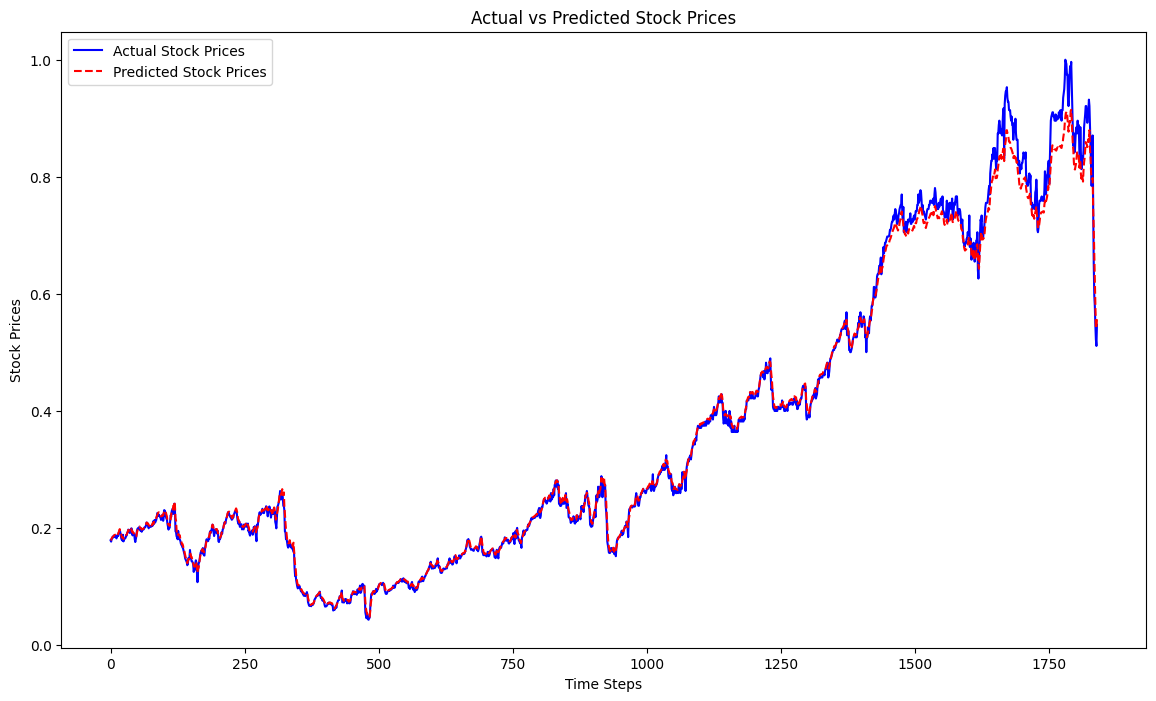

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined and cleaned.
# If X_train and X_test are numpy arrays, dropna() is not applicable

# Predict using the model trained earlier
y_pred = model.predict(X_test)

# Evaluate the model using MSE and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the comparison between actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_df.head())

# Plotting Predicted vs Actual Stock Prices
plt.figure(figsize=(14, 8))
plt.plot(y_test, label="Actual Stock Prices", color='blue')
plt.plot(y_pred, label="Predicted Stock Prices", color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

MAE: 0.009782213434287182, MSE: 0.00030625403028881854, RMSE: 0.01750011515073025, R²: 0.9953332813883768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Adding more lag features (Lag_4, Lag_5)
df['Lag_4'] = df['Scaled_Close'].shift(4)
df['Lag_5'] = df['Scaled_Close'].shift(5)

# Drop NaN values caused by lagging
df.dropna(inplace=True)

# Prepare updated data for training with additional lag features
X = df[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Scaled_Open', 'Scaled_High', 'Scaled_Low', 'Scaled_Volume']].values
y = df['Scaled_Close'].values

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape the data for LSTM input (samples, timesteps, features)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))

import tensorflow as tf

# Resetting seed before training
tf.random.set_seed(None)  # Different seed each time
np.random.seed(None)

# Rebuild and retrain the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, X_train2.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train2, y_train2, epochs=15, batch_size=32, validation_data=(X_test2, y_test2))

# Predict stock prices again and evaluate
y_pred2 = model.predict(X_test2)
y_pred2_rescaled = scaler.inverse_transform(y_pred2)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0101 - val_loss: 3.0204e-04
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.5639e-04 - val_loss: 1.4452e-04
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8819e-04 - val_loss: 2.3466e-04
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3505e-04 - val_loss: 1.9638e-04
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.4254e-04 - val_loss: 2.7510e-04
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8274e-04 - val_loss: 3.7255e-04
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6492e-04 - val_loss: 2.2416e-04
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4705e-04 - val_loss: 7.3488e-04
Epoch 9/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3755e-04 - val_loss: 6.9739e-04
Epoch 10/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2808e-04 - val_loss: 4.5494e-04
Epoch 11/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4407e-04 - 

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 0.0009970386027205542
R-squared: 0.9848110334724874
     Actual  Predicted
0  0.176988   0.177610
1  0.181385   0.180533
2  0.182484   0.182258
3  0.185782   0.183429
4  0.184317   0.183892


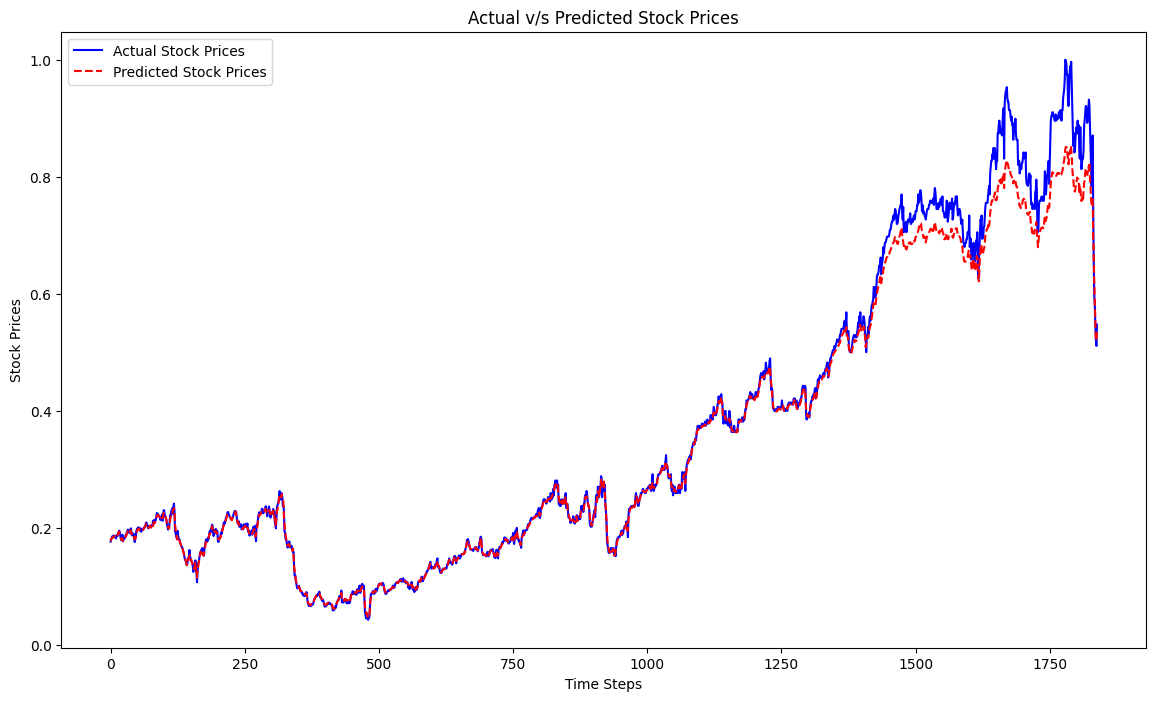

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined and cleaned.
# If X_train and X_test are numpy arrays, dropna() is not applicable

# Predict using the model trained earlier
y_pred2 = model.predict(X_test2)

# Evaluate the model using MSE and R-squared metrics
mse = mean_squared_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the comparison between actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
print(comparison_df.head())

# Plotting Predicted vs Actual Stock Prices
plt.figure(figsize=(14, 8))
plt.plot(y_test2, label="Actual Stock Prices", color='blue')
plt.plot(y_pred2, label="Predicted Stock Prices", color='red', linestyle='--')
plt.title('Actual v/s Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test2, y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = mean_squared_error(y_test2, y_pred2, squared=False)
r2 = r2_score(y_test2, y_pred2)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

MAE: 0.015804365254732104, MSE: 0.0009970386027205542, RMSE: 0.03157591808199018, R²: 0.9848110334724874


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


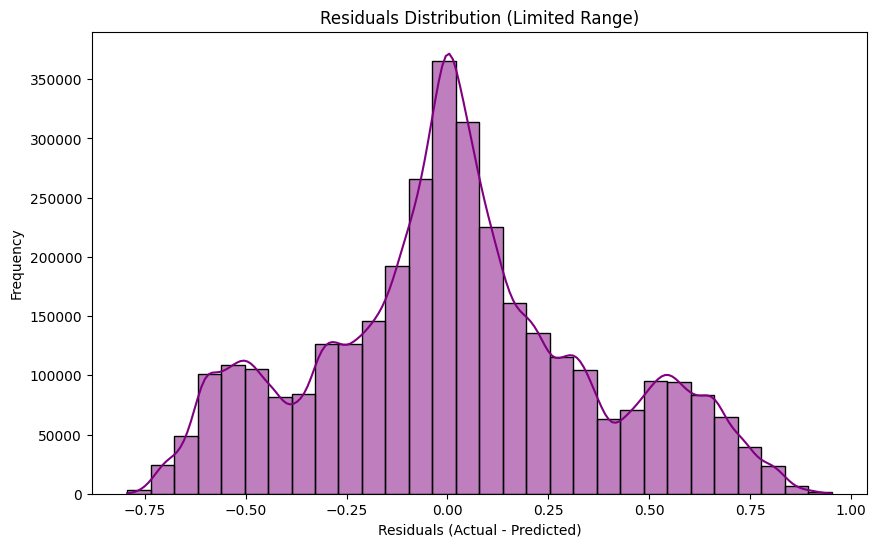

In [ ]:
residuals = y_test2 - y_pred2
plt.figure(figsize=(10, 6))
sns.histplot(residuals[(residuals >= -1) & (residuals <= 1)], kde=True, color='purple', bins=30)
plt.title('Residuals Distribution (Limited Range)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()